<a href="https://colab.research.google.com/github/gustavoramos82/Taxa-de-credito/blob/main/taxa_credito_tratamento_inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
taxa_juros = pd.read_csv('Taxas_de_juros_-_Mensal.csv')
taxa_juros.head()

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,anoMes
0,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,"0,83","10,46",2023-08
1,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO RODOBENS S.A.,0,0,2023-08
2,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BCO DO EST. DO PA S.A.,"0,37","4,5",2023-08
3,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,CAIXA ECONOMICA FEDERAL,"0,86","10,83",2023-08
4,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO SANTANDER (BRASIL) S.A.,"1,13","14,46",2023-08


In [ ]:
taxa_juros.shape

(4514, 7)

In [ ]:
taxa_juros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Mes                    4514 non-null   object
 1   Modalidade             4514 non-null   object
 2   Posicao                4514 non-null   int64 
 3   InstituicaoFinanceira  4514 non-null   object
 4   TaxaJurosAoMes         4514 non-null   object
 5   TaxaJurosAoAno         4514 non-null   object
 6   anoMes                 4514 non-null   object
dtypes: int64(1), object(6)
memory usage: 247.0+ KB


In [ ]:
taxa_juros['TaxaJurosAoMes'] = taxa_juros['TaxaJurosAoMes'].str.replace(',','.')
taxa_juros['TaxaJurosAoMes'] = taxa_juros['TaxaJurosAoMes'].astype(float)

taxa_juros['TaxaJurosAoAno'] = taxa_juros['TaxaJurosAoAno'].str.replace(',','.')
taxa_juros['TaxaJurosAoAno'] = taxa_juros['TaxaJurosAoAno'].astype(float)

taxa_juros.head()

,Mes,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,anoMes
0,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,0.83,10.46,2023-08
1,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO RODOBENS S.A.,0.00,0.00,2023-08
2,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BCO DO EST. DO PA S.A.,0.37,4.50,2023-08
3,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,CAIXA ECONOMICA FEDERAL,0.86,10.83,2023-08
4,Ago-2023,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO SANTANDER (BRASIL) S.A.,1.13,14.46,2023-08


In [ ]:
taxa_juros.drop('Mes',axis=1,inplace=True)
taxa_juros.head()

,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,anoMes
0,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,0.83,10.46,2023-08
1,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO RODOBENS S.A.,0.00,0.00,2023-08
2,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BCO DO EST. DO PA S.A.,0.37,4.50,2023-08
3,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,CAIXA ECONOMICA FEDERAL,0.86,10.83,2023-08
4,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO SANTANDER (BRASIL) S.A.,1.13,14.46,2023-08


In [ ]:
taxa_juros['anoMes'] = pd.to_datetime(taxa_juros['anoMes'],format='%Y-%m')
taxa_juros.head()

,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,anoMes
0,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,0.83,10.46,2023-08-01
1,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO RODOBENS S.A.,0.00,0.00,2023-08-01
2,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BCO DO EST. DO PA S.A.,0.37,4.50,2023-08-01
3,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,CAIXA ECONOMICA FEDERAL,0.86,10.83,2023-08-01
4,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO SANTANDER (BRASIL) S.A.,1.13,14.46,2023-08-01


In [ ]:
taxa_juros.duplicated().sum()

0

In [ ]:
taxa_juros['Modalidade'].unique()

array(['FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO - PRÉ-FIXADO',
       'FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO - PÓS-FIXADO REFERENCIADO EM IPCA',
       'FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS - PÓS-FIXADO REFERENCIADO EM IPCA',
       'FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS - PRÉ-FIXADO',
       'FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS - PÓS-FIXADO REFERENCIADO EM TR',
       'FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO - PÓS-FIXADO REFERENCIADO EM TR'],
      dtype=object)

In [ ]:
taxa_juros['InstituicaoFinanceira'].unique()

array(['CAIXA ECONOMICA FEDERAL', 'BCO RODOBENS S.A.',
       'BCO DO EST. DO PA S.A.', 'BCO SANTANDER (BRASIL) S.A.',
       'BCO BANESTES S.A.', 'APE POUPEX', 'CH PIRATINI - CHP',
       'BCO DO EST. DE SE S.A.', 'BANCO BARI S.A.',
       'BCO COOPERATIVO SICREDI S.A.', 'BCO DO BRASIL S.A.',
       'BANCO SEMEAR', 'BANCO SICOOB S.A.', 'BCO LUSO BRASILEIRO S.A.',
       'BRB - BCO DE BRASILIA S.A.', 'BCO DO ESTADO DO RS S.A.',
       'BARI CIA HIPOTECÁRIA', 'BCO BRADESCO S.A.', 'BCO DAYCOVAL S.A',
       'ITAÚ UNIBANCO S.A.', 'BANCO INTER', 'BCO RIBEIRAO PRETO S.A.',
       'BCO SAFRA S.A.', 'BCO SOFISA S.A.',
       'BCO MERCANTIL DO BRASIL S.A.', 'BCO CITIBANK S.A.',
       'CHB - CIA HIPOT. BRASILEIRA', 'KIRTON BANK',
       'BRAZILIAN MORTGAGES CH S.A.', 'TRADIÇÃO', 'ECONOMISA', 'DOMUS CH',
       'RODOBENS CH', 'BCO BMG S.A.', 'CPCI', 'BANCO ORIGINAL'],
      dtype=object)

In [ ]:
taxa_juros.describe()

,Posicao,TaxaJurosAoMes,TaxaJurosAoAno
count,4514.000000,4514.000000,4514.000000
mean,5.350022,0.836367,46.939486
std,3.565442,1.567728,2046.686324
min,1.000000,0.000000,0.000000
25%,2.000000,0.630000,7.812500
50%,5.000000,0.750000,9.370000
75%,8.000000,0.910000,11.480000
max,16.000000,82.210000,133792.510000


In [ ]:
taxa_juros['Ano'] = taxa_juros['anoMes'].dt.year
taxa_juros.head()

,Modalidade,Posicao,InstituicaoFinanceira,TaxaJurosAoMes,TaxaJurosAoAno,anoMes,Ano
0,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,CAIXA ECONOMICA FEDERAL,0.83,10.46,2023-08-01,2023
1,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,1,BCO RODOBENS S.A.,0.00,0.00,2023-08-01,2023
2,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,BCO DO EST. DO PA S.A.,0.37,4.50,2023-08-01,2023
3,FINANCIAMENTO IMOBILIÁRIO COM TAXAS REGULADAS ...,1,CAIXA ECONOMICA FEDERAL,0.86,10.83,2023-08-01,2023
4,FINANCIAMENTO IMOBILIÁRIO COM TAXAS DE MERCADO...,2,BCO SANTANDER (BRASIL) S.A.,1.13,14.46,2023-08-01,2023


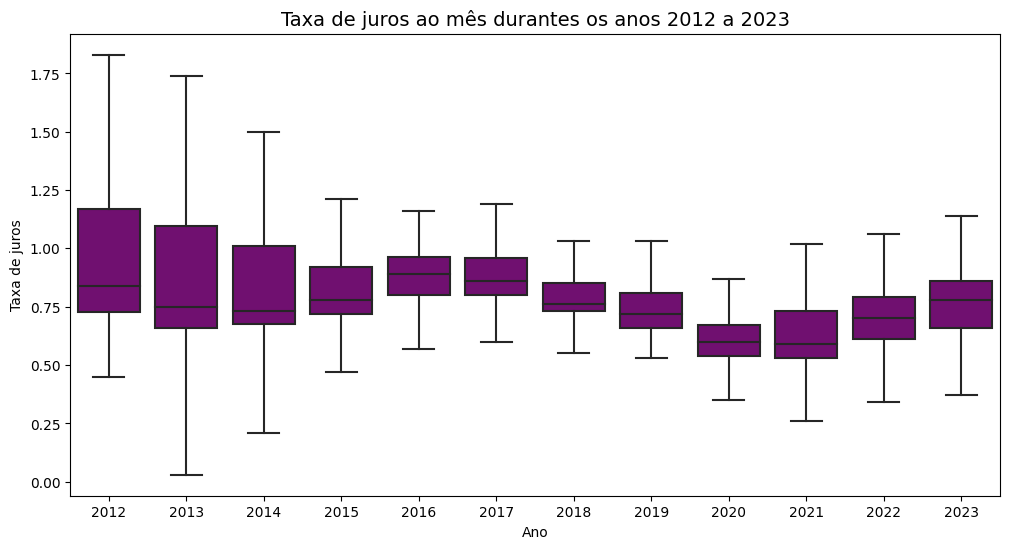

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Taxa de juros ao mês durantes os anos 2012 a 2023',
          fontsize=14)
sns.boxplot(y='TaxaJurosAoMes',x='Ano',data=taxa_juros,color='purple',
            showfliers=False)
plt.xlabel('Ano')
plt.ylabel('Taxa de juros');

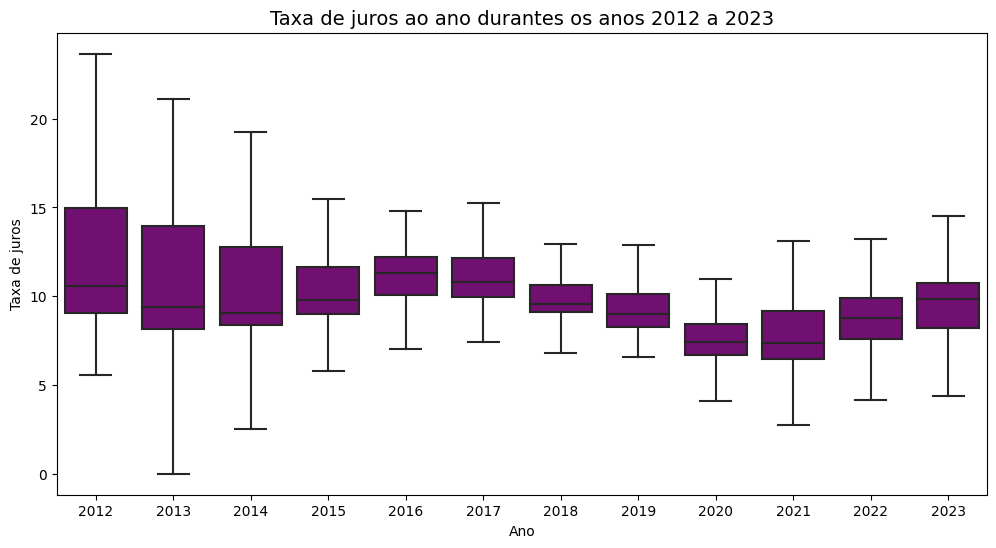

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Taxa de juros ao ano durantes os anos 2012 a 2023',
          fontsize=14)
sns.boxplot(y='TaxaJurosAoAno',x='Ano',data=taxa_juros,color='purple',
            showfliers=False)
plt.xlabel('Ano')
plt.ylabel('Taxa de juros');

<ipython-input-32-4754a410ee66>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x='Ano',y='TaxaJurosAoMes',data=taxa_juros.groupby(by='Ano').mean().reset_index())
<ipython-input-32-4754a410ee66>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x='Ano',y='TaxaJurosAoAno',data=taxa_juros.groupby(by='Ano').mean().reset_index())


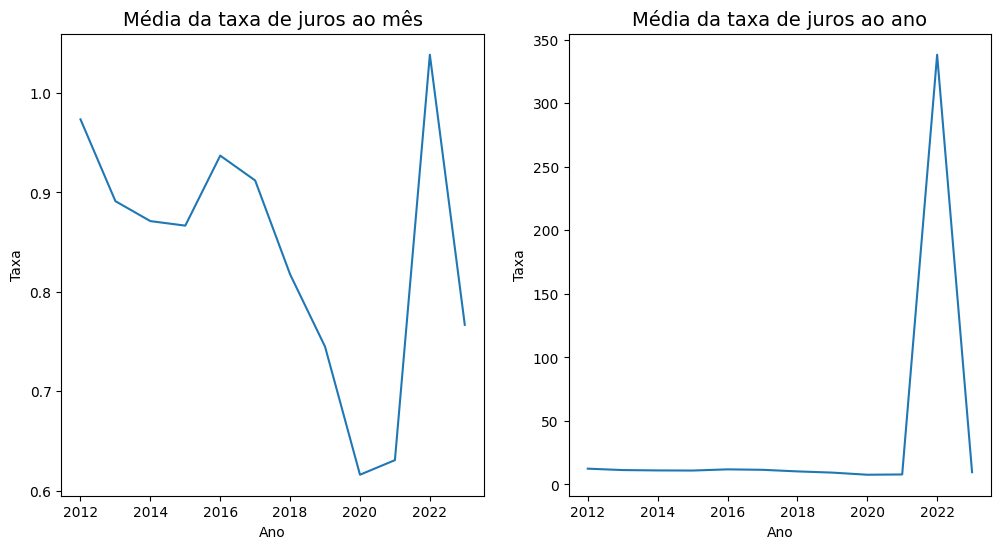

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Média da taxa de juros ao mês',fontsize=14)
sns.lineplot(x='Ano',y='TaxaJurosAoMes',data=taxa_juros.groupby(by='Ano').mean().reset_index())
plt.xlabel('Ano')
plt.ylabel('Taxa');

plt.subplot(1,2,2)
plt.title('Média da taxa de juros ao ano',fontsize=14)
sns.lineplot(x='Ano',y='TaxaJurosAoAno',data=taxa_juros.groupby(by='Ano').mean().reset_index())
plt.xlabel('Ano')
plt.ylabel('Taxa');

In [ ]:
px.line(taxa_juros,x='anoMes',y='TaxaJurosAoMes',color='InstituicaoFinanceira')

In [ ]:
taxa_juros.to_csv('taxa_juros_tratamento_inicial.csv')